**Project 3**

**Intro**
In this report i implement a Support Vector classifier with both linear and rbf kernels.
I implement the SVM for two datasets, both are from kaggle, but are very different. The "Large_Industrial_Pump_Maintenance_Dataset"(https://www.kaggle.com/datasets/selonamaris/large-industrial-pump-maintenance-dataset/data) 
is most likley AI generated data, as was proposed by a commenter on kaggle. The other data "Sensor"(https://www.kaggle.com/datasets/nphantawee/pump-sensor-data) is real pump-sensor data from a person that works in a pump house. Their pumps stopped working, and their team could not see any patterns between sensor readings and pump function.

**Task 1**
Implementing a SVM with linear and rbf kernel

In [1]:
from Data_Model import DataModel # Importing my DataModel class
import pandas as pd 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as  np
from scipy.stats import beta, betabinom

In the cell below im preparing the main data:
Large_Industrial_pump_Maintenace_Dataset.csv

In [2]:
df = pd.read_csv("Large_Industrial_Pump_Maintenance_Dataset.csv")
#data_model = DataModel(df)
dm=DataModel(df, target_column = "Maintenance_Flag")

#Splitting my data into train, validation and test data using my split_data function
#I continue splitting my data as 70% train, 15% for both test and validation as it was fine last time
split_data_function=dm.split_data()
train_data, validation_data, test_data = split_data_function

#preparing training data
X_train = train_data.drop(columns=["Maintenance_Flag" , "Pump_ID"])
Y_train = train_data["Maintenance_Flag"]

#preparing test data
X_test = test_data.drop(columns=["Maintenance_Flag", "Pump_ID"])
Y_test = test_data["Maintenance_Flag"]

# my code took really long to run, so im taking a smaller sample from my X_train and Y_train
# I used this mainly when testing different methods for training the SVM
X_train_small = X_train.sample(n=1000, random_state = 0)
Y_train_small = Y_train.loc[X_train_small.index]

Here im preparing my other dataset:
sensor.csv

In [3]:
# Loading sensor data to test if my datamodel class works on other datasets
sensor_df = pd.read_csv("sensor.csv")
dm_sensor = DataModel(sensor_df, target_column="machine_status")

# Splitting sensor data 
train_sensor, val_sensor, test_sensor = dm_sensor.split_data()

# Preparing X and Y 
X_train_sensor, Y_train_sensor = dm_sensor.prepare_data(train_sensor)
X_test_sensor, Y_test_sensor = dm_sensor.prepare_data(test_sensor)

# Making sure train and test have same columns because some had NaNs
common_cols = X_train_sensor.columns.intersection(X_test_sensor.columns)
X_train_sensor = X_train_sensor[common_cols]
X_test_sensor = X_test_sensor[common_cols]

# Same here as for the other dataset. Im making a smaller sample
X_train_sensor_small = X_train_sensor.sample(n=20000, random_state = 0)
Y_train_sensor_small = Y_train_sensor.loc[X_train_sensor_small.index]

In [4]:
#Training both the linear and rbf SVM on "Large_Industrial_Pump_Maintenance_Dataset.csv"
SVM_linear = dm.svm_class(X_train=X_train, Y_train=Y_train, kernel="linear",C=1.0)
SVM_rbf = dm.svm_class(X_train=X_train, Y_train=Y_train, kernel="rbf", C=1.0, gamma = "scale")

#Here im trainning the SVM on the sensor data
SVM_linear_sensor = dm.svm_class(X_train = X_train_sensor_small, Y_train = Y_train_sensor_small, kernel = "linear", C= 1.0)
SVM_rbf_sensor = dm.svm_class(X_train = X_train_sensor_small, Y_train = Y_train_sensor_small, kernel = "rbf", C=1.0, gamma = "scale")

In [ ]:
# Here im prediciting values based on the training i did for both my SVM_linear and SVM_rbf in the cell abvove
# Im doing this as i want to compare the predicted values i get here with the true values.

#Preparing results for "Large_Industrial_Pump_Maintenance_Dataset.csv" dataset
y_predict_linear = SVM_linear.predict(X_test)
y_predict_rbf = SVM_rbf.predict(X_test)

precision_linear = precision_score(Y_test, y_predict_linear)
precision_rbf = precision_score(Y_test, y_predict_rbf)

recall_linear = recall_score(Y_test, y_predict_linear)
recall_rbf = recall_score(Y_test, y_predict_rbf)

SVM_linear_accuracy_y = accuracy_score(Y_test, y_predict_linear)
SVM_rbf_accuracy_y = accuracy_score(Y_test, y_predict_rbf)


#Here im preparing reults for the "sensor.csv" data
y_predict_linear_sensor = SVM_linear_sensor.predict(X_test_sensor)
y_predict_rbf_sensor = SVM_rbf_sensor.predict(X_test_sensor)

precision_linear_sensor = precision_score(Y_test_sensor, y_predict_linear_sensor, average = "weighted")
precision_rbf_sensor = precision_score(Y_test_sensor, y_predict_rbf_sensor, average = "weighted")

recall_linear_sensor = recall_score(Y_test_sensor, y_predict_linear_sensor, average = "weighted")
recall_rbf_sensor = recall_score(Y_test_sensor, y_predict_rbf_sensor, average = "weighted")

SVM_linear_accuracy_y_sensor = accuracy_score(Y_test_sensor, y_predict_linear_sensor)
SVM_rbf_accuracy_y_sensor = accuracy_score(Y_test_sensor, y_predict_rbf_sensor)


c:\Users\joaki\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joaki\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Large_Industrial_Pump_Maintenance_Dataset.csv
           Linear SVM   RBF SVM
Accuracy     0.495333  0.497667
Precision    0.476630  0.475755
Recall       0.538943  0.470793
                sensor.csv
           Linear SVM   RBF SVM
Accuracy     0.999395  0.999758
Precision    1.000000  1.000000
Recall       0.999395  0.999758


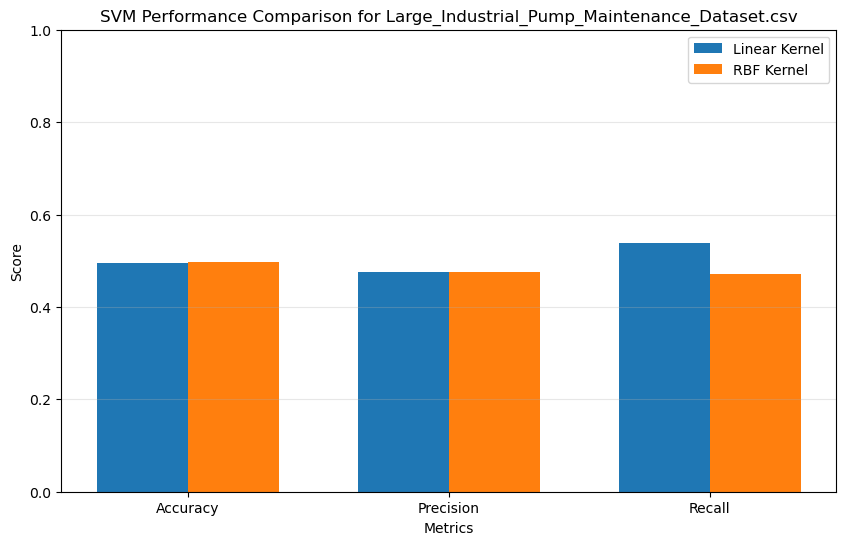

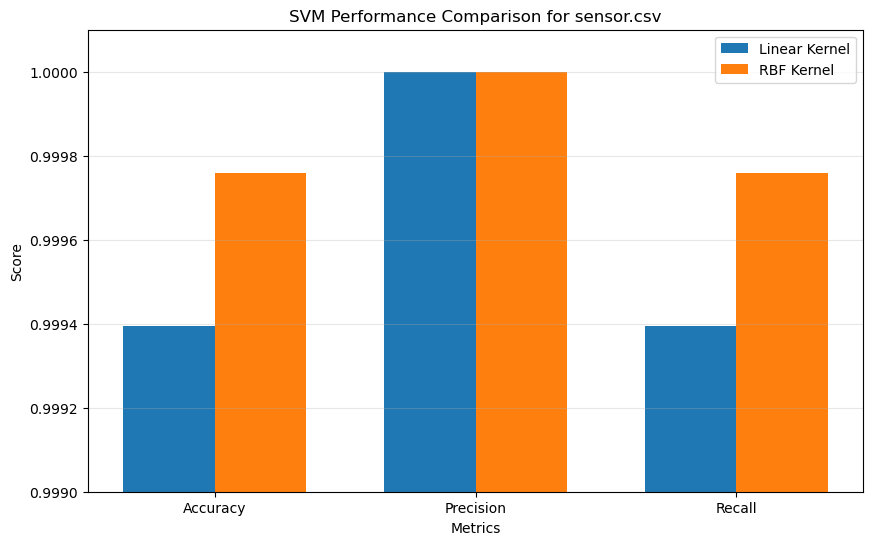

In [ ]:
#Using pandas to show a nice table-comparison of the performance across different scores
#for my "Large_Industrial_Pump_Maintenance_Dataset.csv"
comparison = pd.DataFrame({
"Linear SVM": [SVM_linear_accuracy_y, precision_linear, recall_linear],
"RBF SVM": [SVM_rbf_accuracy_y, precision_rbf, recall_rbf]},
index=["Accuracy", "Precision", "Recall"])
print("Large_Industrial_Pump_Maintenance_Dataset.csv")
print(comparison)


#Making generating my table-comparison for the sensor.csv data
comparison_sensor = pd.DataFrame({
"Linear SVM": [SVM_linear_accuracy_y_sensor, precision_linear_sensor, recall_linear_sensor],
"RBF SVM": [SVM_rbf_accuracy_y_sensor, precision_rbf_sensor, recall_rbf_sensor]},
index=["Accuracy", "Precision", "Recall"])
print("                sensor.csv")
print(comparison_sensor)


#Preparing for plotting with "Large_Industrial_Pump_Maintenance_Dataset.csv"
linear_scores = [SVM_linear_accuracy_y, precision_linear, recall_linear]
rbf_scores = [SVM_rbf_accuracy_y, precision_rbf, recall_rbf]

#Preparing for plotting with "sensor.csv"
linear_scores_sensor = [SVM_linear_accuracy_y_sensor, precision_linear_sensor, recall_linear_sensor]
rbf_scores_sensor = [SVM_rbf_accuracy_y_sensor, precision_rbf_sensor, recall_rbf_sensor]

#Plotting a compatison of the performance of linear and rbf
#with "Large_Industrial_Pump_Maintenance_Dataset.csv"
plt.figure(figsize=(10, 6))  
plt.bar(np.array([1,2,3]) - 0.175, linear_scores, 0.35, label="Linear Kernel")
plt.bar(np.array([1,2,3]) + 0.175, rbf_scores, 0.35, label="RBF Kernel")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("SVM Performance Comparison for Large_Industrial_Pump_Maintenance_Dataset.csv")
plt.xticks(np.array([1,2,3]),("Accuracy", "Precision", "Recall"))  
plt.legend()  
plt.ylim([0, 1])  
plt.grid(axis="y", alpha=0.3) 
plt.show()


#Plotting a compatison of the performance of linear and rbf
#with "sensor.csv"
plt.figure(figsize=(10, 6))  
plt.bar(np.array([1,2,3]) - 0.175, linear_scores_sensor, 0.35, label="Linear Kernel")
plt.bar(np.array([1,2,3]) + 0.175, rbf_scores_sensor, 0.35, label="RBF Kernel")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("SVM Performance Comparison for sensor.csv")
plt.xticks(np.array([1,2,3]),("Accuracy", "Precision", "Recall"))  
plt.legend()  
plt.ylim([0.999, 1.0001])  
plt.grid(axis="y", alpha=0.3) 
plt.show()

This is really interesting. Training on the Large_Industrial_Pump_Maintenance_Dataset gave a model that was no better than just pure guessing.

On the otherhand the data from real sensor readings gives me a near perfect prediction

**Task2**

For task 2 im not going to use the sensor data. Because bayesian regression expects binary data. The states of machine_status in sensor.csv is defined in the DataModel as:
Normal = 0, Recovering = 1, Broken = 2

In [15]:
print("Number of pumps that need maintenance",Y_train.sum())
print("Number of pumps that dont need maintenance",len(Y_train)-Y_train.sum())

#calling my bayesian regression function 
bayes_model = dm.bayesian_regression(X_train, Y_train)
bayes_prediction = bayes_model.predict(X_test)

#converting predictions into binary with 0.5 as the threshold
binary_predictions = (bayes_prediction > 0.5).astype(int)

#comparing actual data to binary predictions
print(accuracy_score(Y_test, binary_predictions))


#This is for the sensor data, but its kept as its interesting
a=Y_train_sensor_small.sum()
b=len(Y_train_sensor_small)-Y_train_sensor_small.sum()
print("As we can se roughly",((a)/(a+b))*100,"%","is in in RECOVERING state for the sensor data")



Number of pumps that need maintenance 7014
Number of pumps that dont need maintenance 6986
0.488
As we can se roughly 9.33 % is in in RECOVERING state for the sensor data


number of successes: 7014
number of failures: 6986
alpha post: 7016
beta post: 6988
posterior mean: 0.5009997143673236
posterior mode: 0.5009998571632623


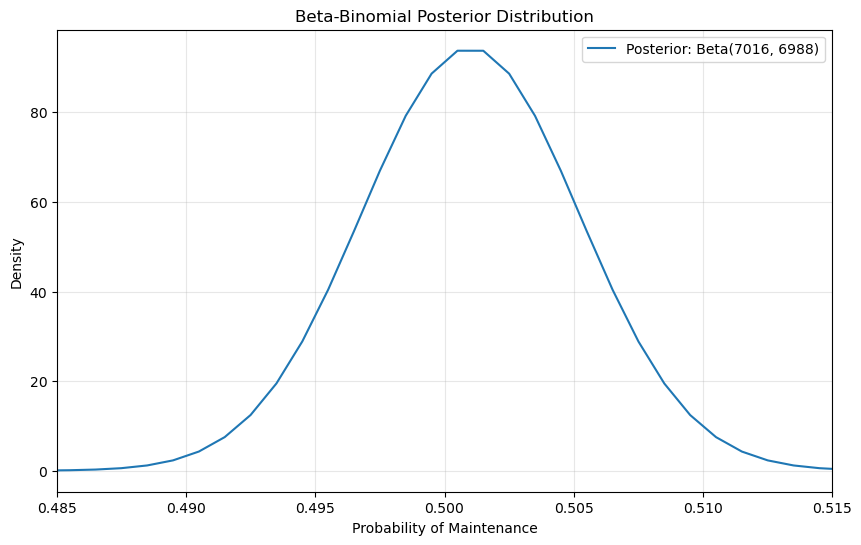

In [14]:
#Calling the beta binomial function and printing results
beta_bim_results = dm.beta_binomial_posterior(Y_train)
print("number of successes:", beta_bim_results["successes"])
print("number of failures:", beta_bim_results["failures"])
print("alpha post:", beta_bim_results["alpha_post"])
print("beta post:", beta_bim_results["beta_post"])
print("posterior mean:", beta_bim_results["posterior_mean"])
print("posterior mode:", beta_bim_results["posterior_mode"])


x = np.linspace(0, 1, 1000)

#defining the probability density function for prior beta (2,2) and posterior distrubutions
prior_pdf = beta.pdf(x, 2, 2)
post_pdf = beta.pdf(x, beta_bim_results["alpha_post"], beta_bim_results["beta_post"])

#plotting results
plt.figure(figsize=(10, 6))
plt.plot(x, post_pdf, label=f"Posterior: Beta({beta_bim_results["alpha_post"]}, {beta_bim_results["beta_post"]})")
plt.xlabel("Probability of Maintenance")
plt.ylabel("Density")
plt.title("Beta-Binomial Posterior Distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0.485, 0.515)
plt.show()

Im choosing to implement linear regression, aswell as mean squared error as task 3 (from lectures) as it was accurate in project 2

In [ ]:
#Defining the linear regression function
lin_reg_model = dm.linreg(X_train,Y_train)
coefficiants, intercept = lin_reg_model

print("Linear regression coefficiants (the first 5):", coefficiants[:5])
print("Intercept:", intercept)

Y_predict_linreg = X_test @ coefficiants+intercept

mse = dm.MSE(Y_test, Y_predict_linreg)

#finding linear regression's accuracy of predicting unseen data
binary_predict_linreg = (Y_predict_linreg > 0.5).astype(int)
accuracy_linreg = accuracy_score(Y_test, binary_predict_linreg)
print(f"Accuracy: {accuracy_linreg:.4f}")

Linear regression coefficiants (the first 5): [-3.35857617e-04  1.81944557e-03 -8.93120219e-05  4.06323834e-04
 -1.45385669e-05]
Intercept: 0.5760720370055102
Accuracy: 0.4953
